# Classification Assignment3 2020AIML003

In [1]:
# Import the required libraries for data frame loading, analysis, pre-processing, visualisation & modeling etc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

In [2]:
# Load the input dataset present in "advertising.csv" using the read_csv method of the pandas dataframe
dataset = pd.read_csv("advertising.csv")

In [3]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the dataframe object
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# inspect the last 5 rows using the tail method of the dataframe object
dataset.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
# inspect how many rows x columns are there in the input data, using the shape variable of the  dataframe
dataset.shape

(1000, 10)

In [6]:
# Lets check using the info method to see nature of columns, any indication of NULL/NaN/missing values in any columns! 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
# we see no missing data, NaN, NULL etc...
# lets see some statistics about the cleaned-up data now
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
# We dont need the columns 'Ad Topic Line', 'Country', 'City' and 'Timestamp' as they are of little value to the model
dataset.drop(['Ad Topic Line','City','Country', 'Timestamp'], axis=1, inplace=True)

# Let's perform some data visualisation to understand relationship between 
# input and output variables, corrleation between input variables etc

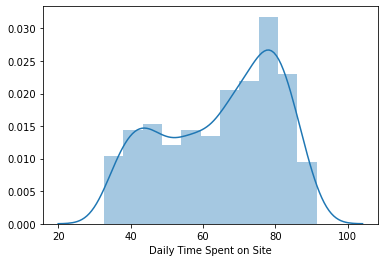

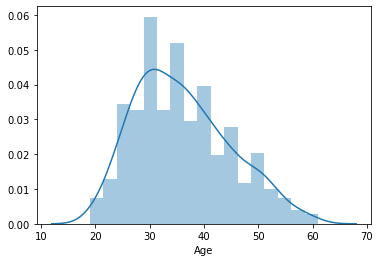

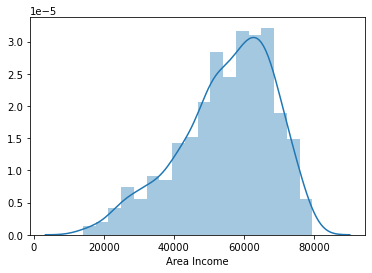

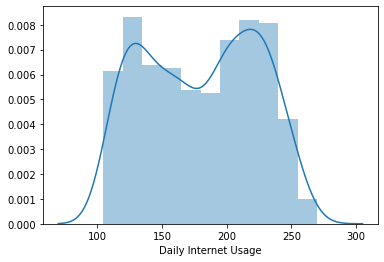

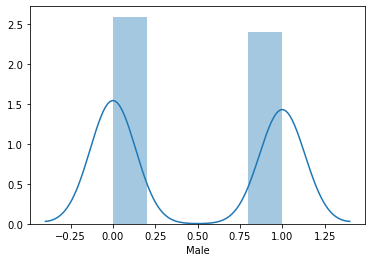

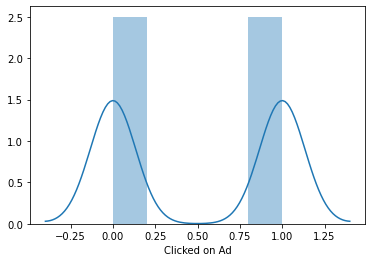

In [9]:
# lets see the histograms of all the features and output variables
for (columnName, columnData) in dataset.iteritems():
    sns.distplot(dataset[columnName])
    plt.show()

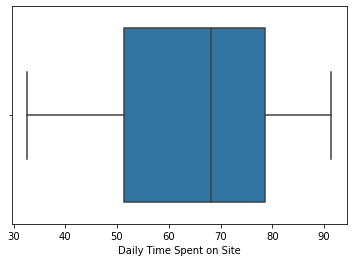

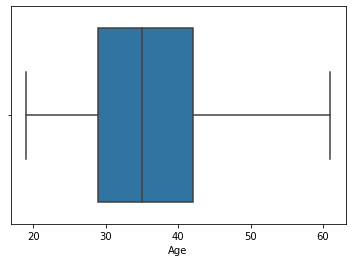

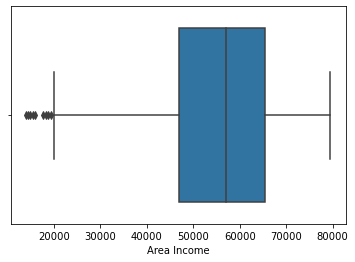

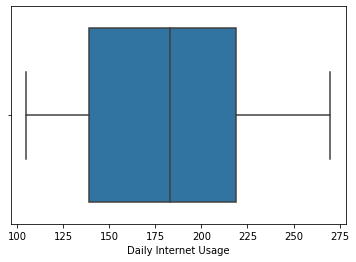

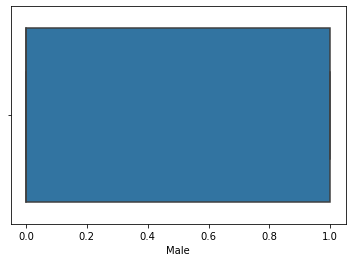

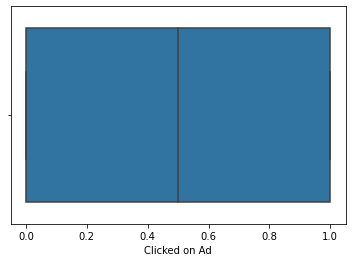

In [10]:
# lets check if there are outliers in the data using box plots
for (columnName, columnData) in dataset.iteritems(): 
    sns.boxplot(x=dataset[columnName])
    plt.show()

In [11]:
dataset.to_csv("advertising_output.csv", index=False)

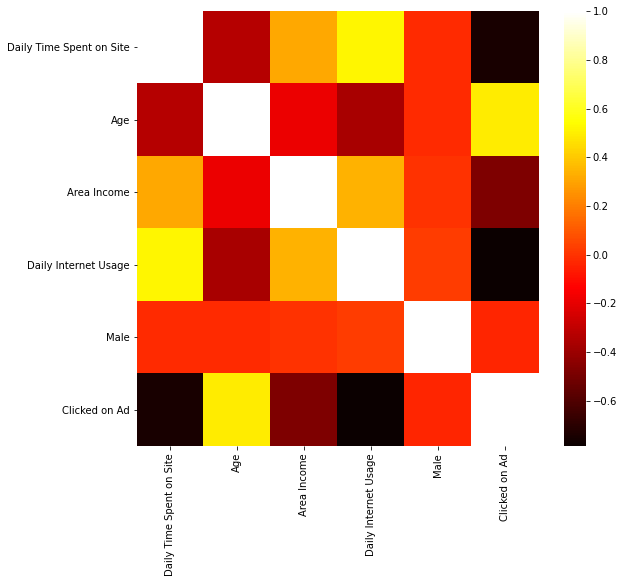

In [12]:
# Now, lets see heat map for correlation between features and outputs
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot") 

In [13]:
# all features seem to be fairly un-correlated
# As all exploratory data analysis, clean up is completed, the data is ready for modeling etc
# let's split features & labels
rows = dataset.shape[0]
cols = dataset.shape[1]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, cols-1].values

# Lets split training and testing data
# We will also stratefy the samples for consistency, to counter input data imbalance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

# Let's scale the data 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Now, Let's classify using decision tree

In [14]:
# instantiate a DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# fit the model on the training data
dtree.fit(X_train, y_train)

# predict the outcomes on the test data
y_predict = dtree.predict(X_test)

# check accuracy of the classification done
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

0.9325
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       200
           1       0.93      0.93      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

[[187  13]
 [ 14 186]]


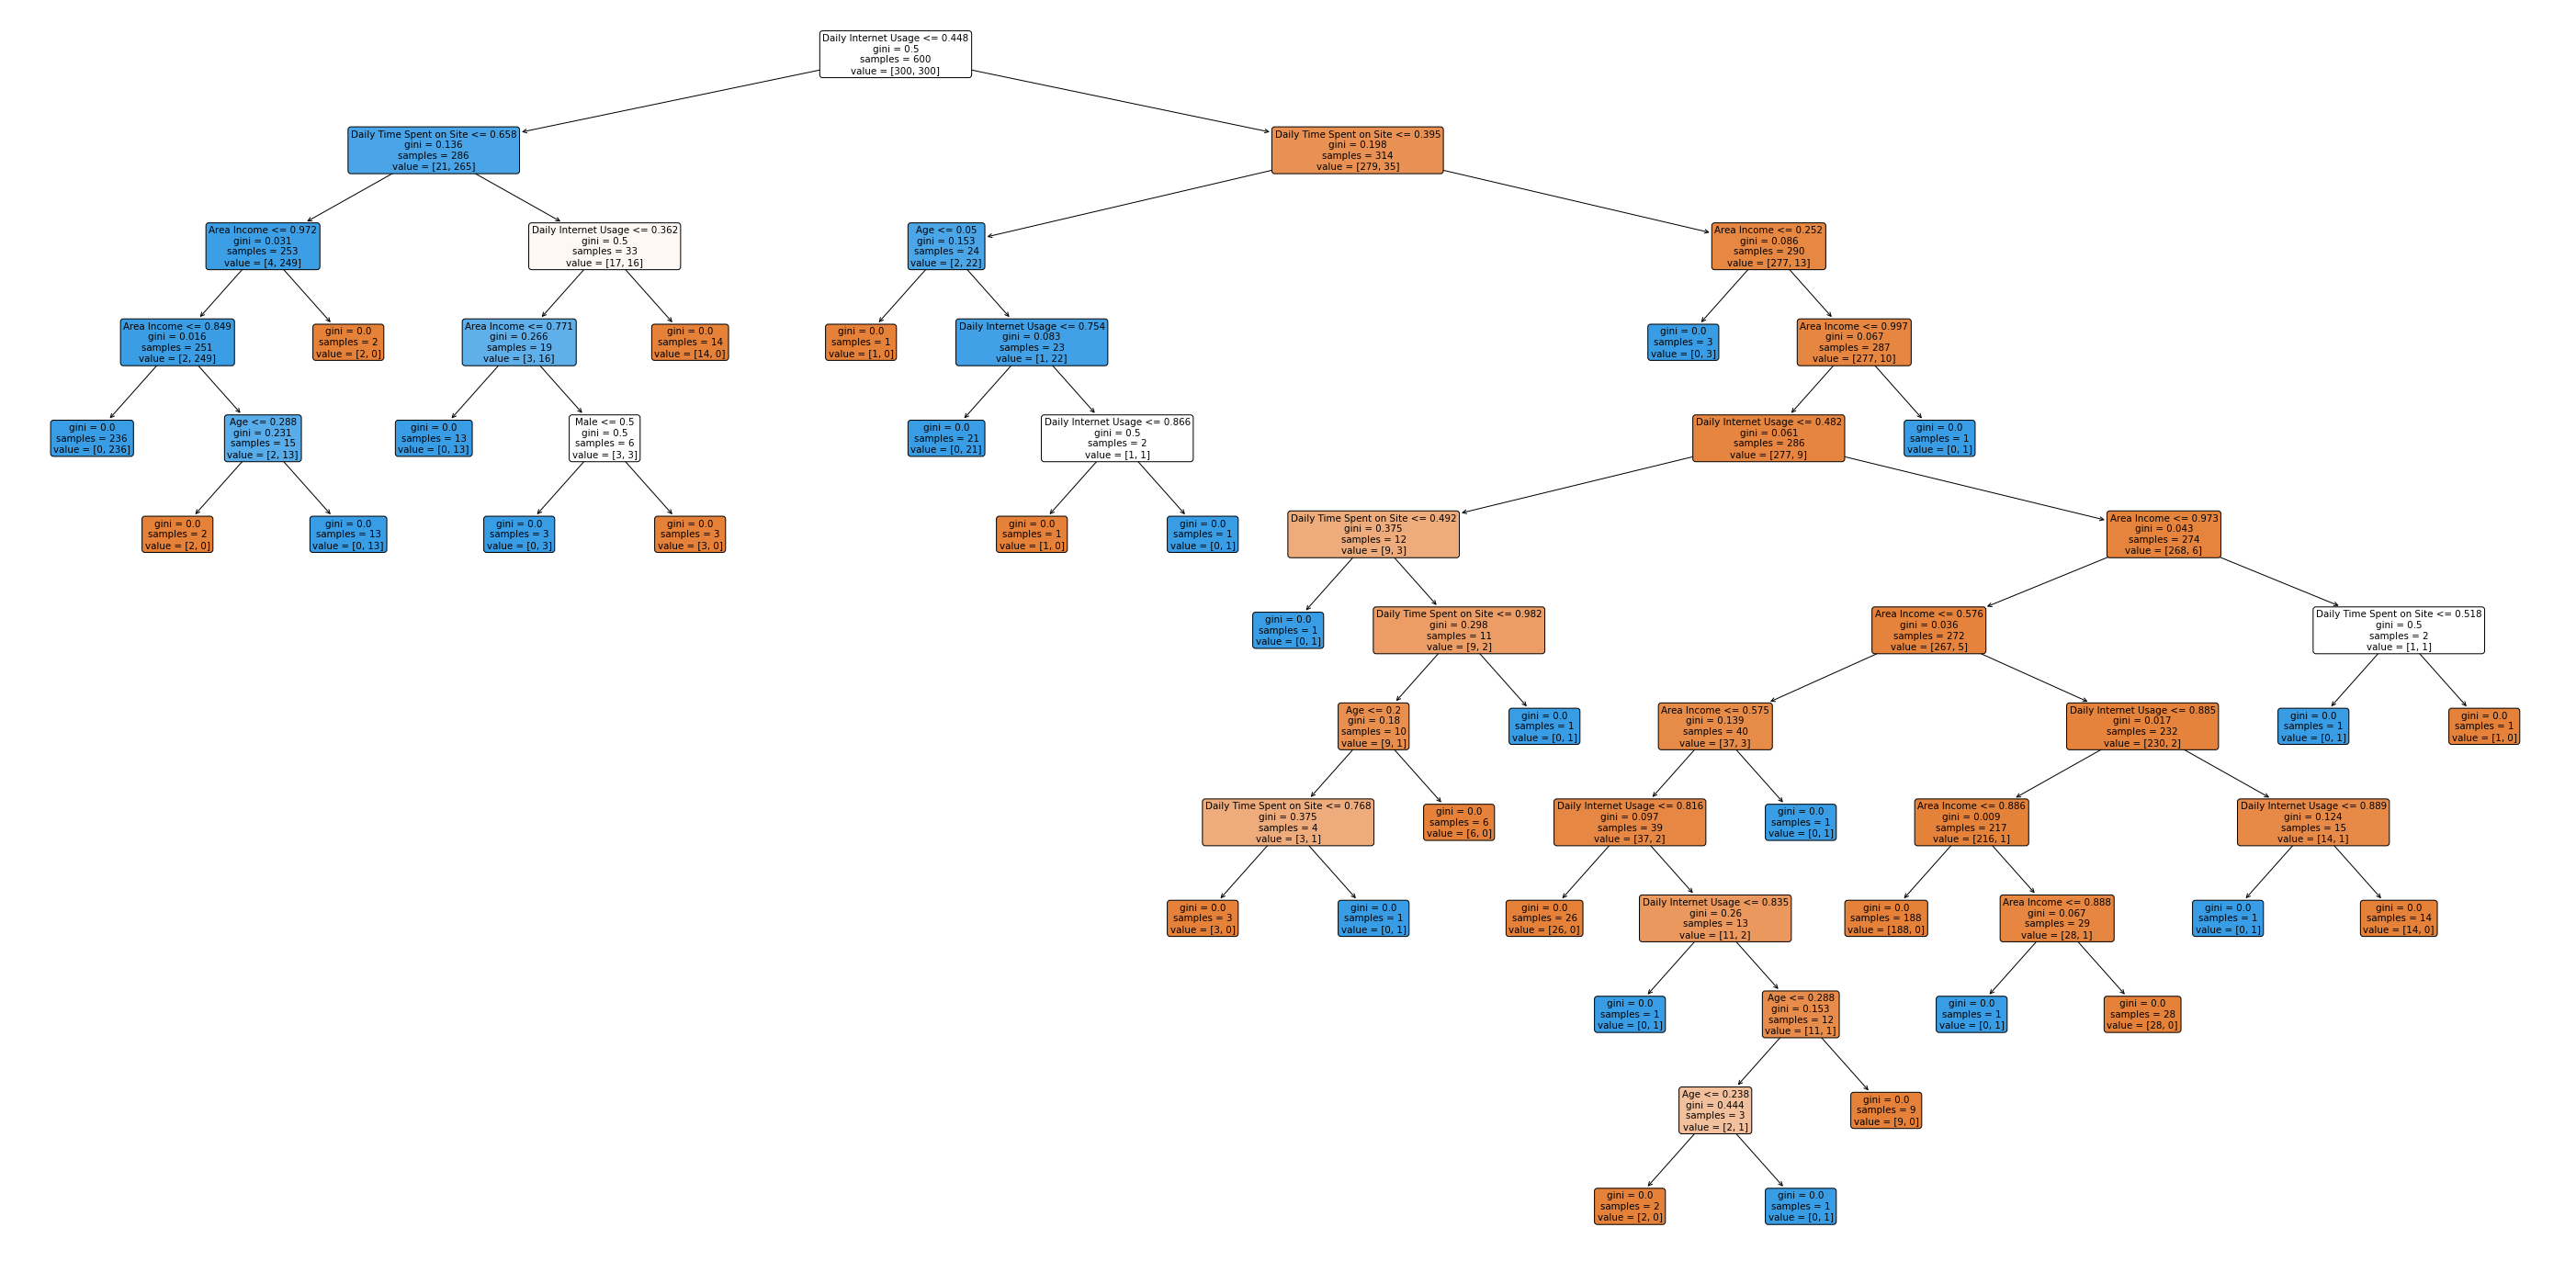

In [15]:
# lets visualize the decision tree 
fig, ax = plt.subplots(figsize=(50, 25))
tree.plot_tree(dtree, feature_names=dataset.columns, rounded=True, filled=True)
plt.show()

In [16]:
# as the tree is too deep, lets try pruning to see if we can still get good accuracy with lesser tree depths too
path = dtree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.0015    , 0.00152778, 0.0015942 , 0.00163462,
        0.0016523 , 0.00165702, 0.00216463, 0.00292271, 0.00311595,
        0.00330677, 0.00421053, 0.00650898, 0.00921891, 0.01905369,
        0.02426286, 0.0561605 , 0.33147744]),
 'impurities': array([0.        , 0.003     , 0.00605556, 0.00924396, 0.01251319,
        0.01912239, 0.02575045, 0.03224435, 0.03516706, 0.038283  ,
        0.04489655, 0.0533176 , 0.05982659, 0.0690455 , 0.08809919,
        0.11236206, 0.16852256, 0.5       ])}

Text(0, 0.5, 'total impurity of leaves')

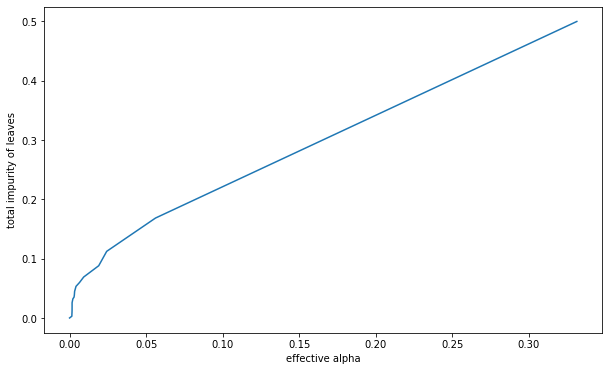

In [17]:
# calculate and plot ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

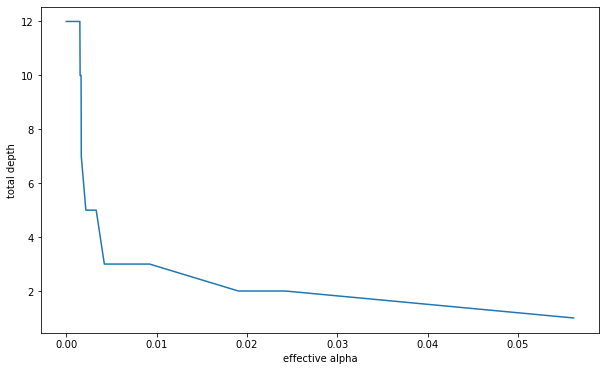

In [19]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

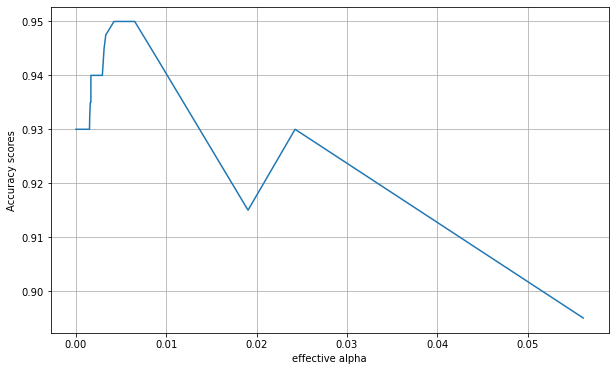

In [20]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [21]:
# we can see from the above that somewhere around 0.005 of effective alpha, we get the maximum accuracy score
# with this pruning done, we get better accuracy than got earlier
dtree = DecisionTreeClassifier(ccp_alpha=0.005)
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       200
           1       0.95      0.94      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

[[191   9]
 [ 11 189]]


In [22]:
# lets also do some pre-pruning by reducing the max_depth of the tree to 5
dtree = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.005)
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       200
           1       0.95      0.94      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

[[191   9]
 [ 11 189]]


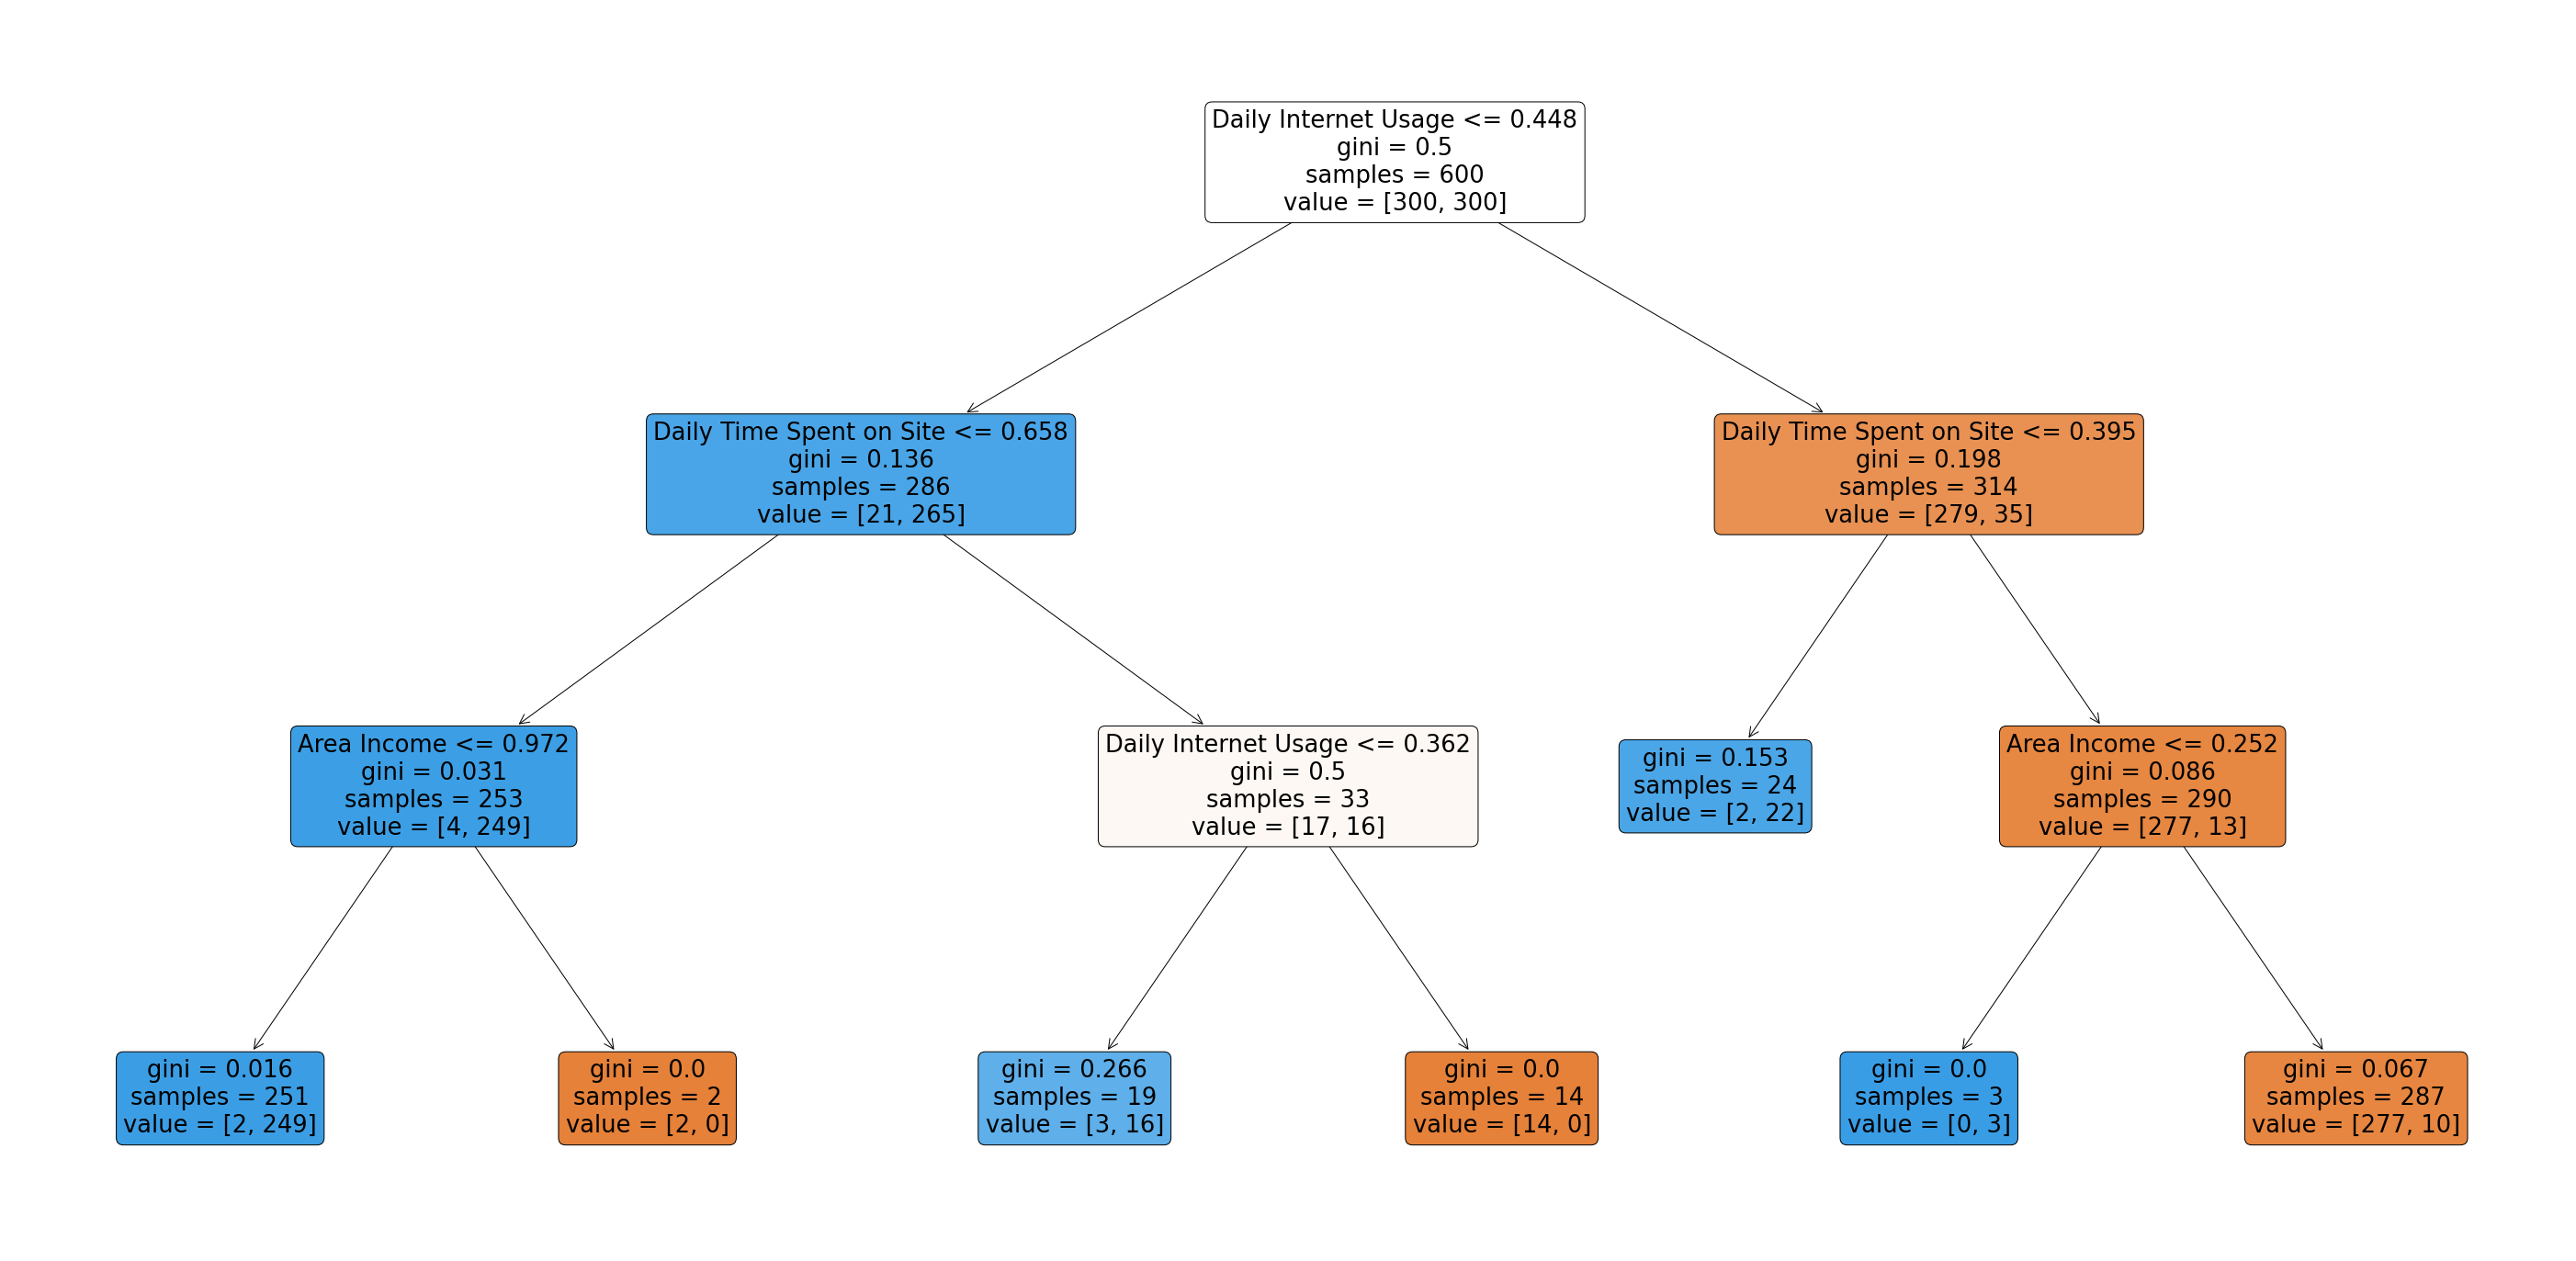

In [23]:
# lets visualize the decision tree 
fig, ax = plt.subplots(figsize=(50, 25))
tree.plot_tree(dtree, feature_names=dataset.columns, rounded=True, filled=True)
plt.show()

In [24]:
# from above, we see that with just max_depth set as 5, we get the same accuracy as the full tree
# this clearly, will be computationally less complex and hence we will settle with tree depth of 5

In [25]:
# lets use some stratified cross sampling to see if that improves accuracy
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X) 

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    dtree.fit(x_train_fold, y_train_fold)
    y_predict = dtree.predict(X_test)
    print(accuracy_score(y_test, y_predict))

0.9625
0.965
0.965
0.9525
0.95
0.955
0.9475
0.955
0.9475
0.9525


In [26]:
# With different stratified splits / cross-samplings, we see how accuracy varies!
# Overall we have got ~95-96% accuracy score with decision tree classifier for the given data set!